# Sara Oppenheim
##Food Truck Analysis
###10-31-2022

#Task 1: Define the Problem
##Are there really foodtrucks whose deliciousness or swank makes them super earners? The null hypothesis I'm testing is that food truck profits are a direct consequence of the number of potential customers in their sphere of influence.

#Task 2a: Install the libraries I may need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as ply
import plotly.express as px
import plotly.io as pio
import scipy as sc
import sympy as sy
import matplotlib as matplot
import statistics as stat
import seaborn as sns


#Task 3: Load the foodtruck data

In [ ]:
ftruck = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/food_truck_data.txt')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
ftruck.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


##Get Data Info
###Gives population (of the region served by the food truck?) and profit (in the region? per truck? Or ???)

In [ ]:
ftruck.columns

Index(['Population', 'Profit'], dtype='object')

In [ ]:
ftruck.shape

(97, 2)

In [ ]:
ftruck.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
ftruck.info

##Find Missing Values
###None found

ftruck AxesSubplot(0.125,0.125;0.62x0.755)
Population    0
Profit        0
dtype: int64


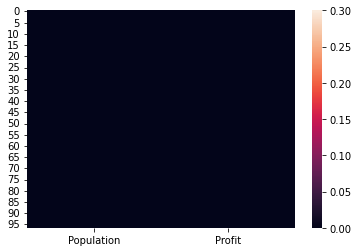

In [ ]:
#generate missing counts and heat maps to assess missing data
print("ftruck",sns.heatmap(ftruck.isnull(),cbar=True,vmin=0,vmax=.3))
print(ftruck.isnull().sum())

#Task 5: Perform Data Cleaning

I'm concerned by the negative profit values. Since there's no indication whether operating costs are factored in, they are very ambiguous. Likewise, what would negative population mean? I'm going to delete all rows with negative values.

In [ ]:
ftruck=ftruck[ftruck["Profit"]>=0]

#Task 6: Visualize Cleaned up Dataset

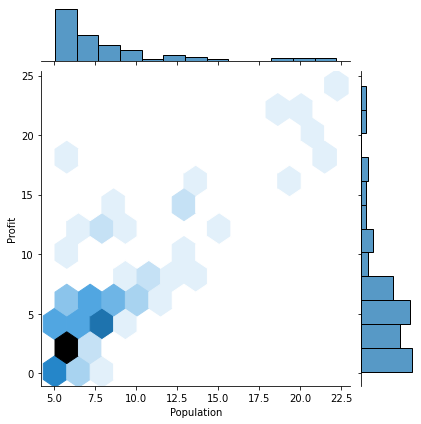

In [ ]:
sns.jointplot(x='Population', y='Profit', data=ftruck, kind='hex')

#Task 7: Conceptualize the problem
##Does variation in population size explain variation in foodtruck profits?

In [ ]:
#Is there any relationship between population and profit?
plt.title("Food truck profits and local population size")
fig=sns.lmplot(x="Population", y="Profit", 
              data=ftruck
             )
plt.show()

#Task 8: Perform Data-Split

In [ ]:
#Import libraries needed for linear regression
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
# Split data into train sets and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)


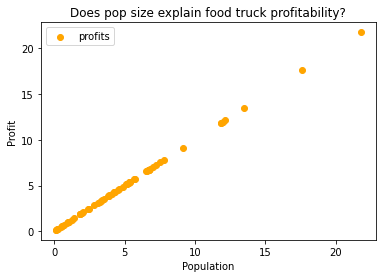

In [ ]:
plt.scatter(x_train, y_train, color="orange", label="profits")
plt.title("Does pop size explain food truck profitability?")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend()
plt.show()

#Task 9a: Choose the ML Method to follow
Using test-train

In [ ]:
reg = LinearRegression()


#Task 10a: Train the ML Model
##I'm generating a regression equation to explain the relationship between X and Y.


In [ ]:
reg.fit(x_train, y_train)


LinearRegression()

#Task 11a: Test the Model
##In doing this I realized I am MUCH CONFUSION. In the simple linear regression below (11b), I understand that I am displaying the real data as one pair of values, the predicted as another. In the plot here, I don't understand where the REAL values are
###arrrgh

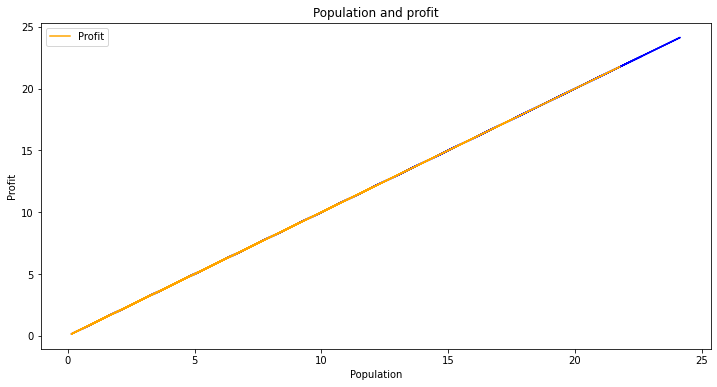

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
#plt.scatter(x_train, y_train, color="green", label="Population")
plt.plot(X, Y, 'blue')   # scatter plot showing actual data
plt.plot(x_train,reg.predict(x_train),color="orange",label="Profit") #what the model predicts
plt.title('Population and profit')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()

In [ ]:
plt.plot(X, ypred)     # regression line
plt.plot(X, Y, 'ro')   # scatter plot showing actual data

#Task 9b: Choose the ML Method to follow
Simple linear regression, no test-train

In [ ]:
#Find the mean values
xmean = np.mean(ftruck['Population'])
ymean= np.mean(ftruck['Profit'])
print("Mean population is ", (xmean),"and mean profit is ", (ymean))

Mean population is  8.276162365591398 and mean profit is  6.155491290322581


In [ ]:
ftruck['xycov'] = (ftruck['Population'] - xmean) * (ftruck['Profit'] - ymean)
ftruck['xvar'] = (ftruck['Population'] - xmean)**2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
beta = ftruck['xycov'].sum() / ftruck['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = -3.450033539039997
beta = 1.1606254692752376


#Task 10b: Train the ML Model
##I'm generating a regression equation to explain the relationship between X and Y.
###I guess this is not "machine learning" since there is no training? Instead it is "simple" linear regression?

In [ ]:
ypred = alpha + (beta*X)

#Task 11b: Test the Model
##Well that is a damn fine predictor even if I do say so myself!

Text(0, 0.5, 'Profit')

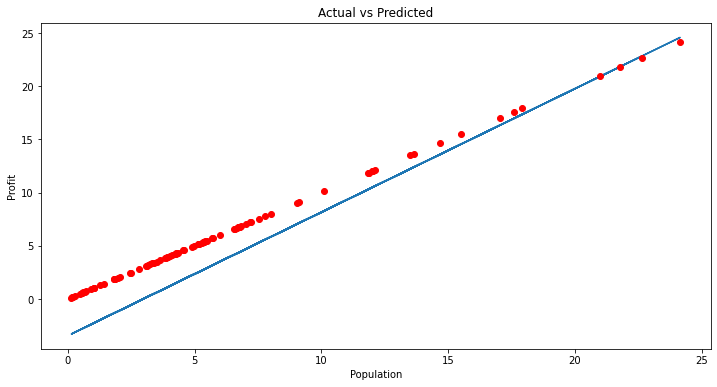

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, Y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Population')
plt.ylabel('Profit')